<a href="https://colab.research.google.com/github/ayushtiwari134/Deep_learning_journey/blob/main/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.datasets import make_blobs
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_decision_regions


### Creating a random dataset for classification

In [8]:
X, y = make_blobs(n_samples=200, centers=2, random_state=42)
noise = np.random.normal(0, 3, size=X.shape)
X += noise

In [9]:
print(X.shape, y.shape)

(200, 2) (200,)


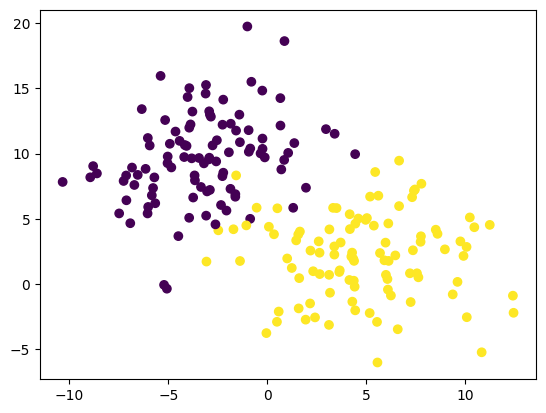

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# Splitting the dataset and training the model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train[:5]

array([[ 3.3979177 , 11.51871386],
       [-4.49521346,  3.67334744],
       [-6.5465452 ,  8.36636733],
       [-5.70673223,  8.17510919],
       [10.45074347,  4.35382863]])

In [13]:
y_train[:5]

array([0, 0, 0, 0, 1])

In [14]:
model = Sequential([
    Dense(32, activation='relu', input_dim=2),
    Dense(64, activation = 'relu'),
    Dense(1,activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history1 = model.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 65ms/step - loss: 0.5582 - accuracy: 0.6719 - val_loss: 0.5479 - val_accuracy: 0.6562
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4192 - accuracy: 0.8359 - val_loss: 0.4253 - val_accuracy: 0.8750
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3204 - accuracy: 0.9297 - val_loss: 0.3545 - val_accuracy: 0.9062
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2632 - accuracy: 0.9453 - val_loss: 0.3111 - val_accuracy: 0.9375
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2254 - accuracy: 0.9453 - val_loss: 0.2854 - val_accuracy: 0.9375
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2013 - accuracy: 0.9453 - val_loss: 0.2667 - val_accuracy: 0.9375
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1848 - accuracy: 0.9453 - val_loss: 0.2567 - val_accuracy: 0.9375
Epoch 8/100
4/4 [===

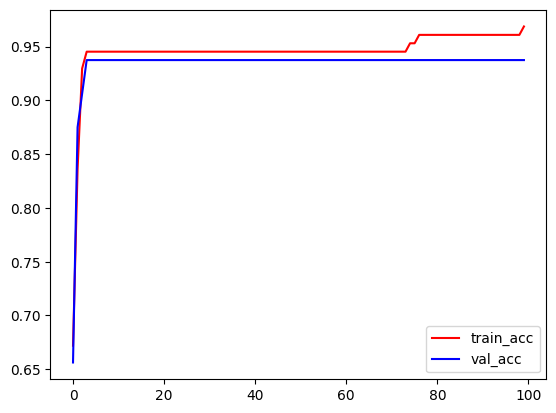

In [18]:
plt.plot(history1.history['accuracy'],color='red',label='train_acc')
plt.plot(history1.history['val_accuracy'],color='blue',label='val_acc')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

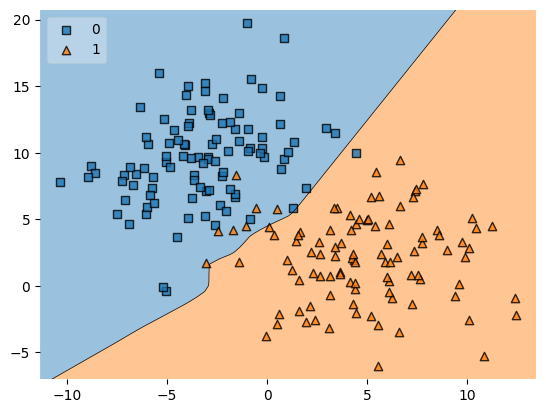

In [19]:
plot_decision_regions(X,y,clf=model,legend=2)

# Creating a new model with more hidden layers and more neurons per layer


In [20]:
model2 = Sequential([
    Dense(128, activation='relu', input_dim=2),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1,activation='sigmoid')
])

In [21]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12865 (50.25 KB)
Trainable params: 12865 (50.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history2 = model2.fit(X_test,y_test,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8519 - accuracy: 0.3750 - val_loss: 0.6813 - val_accuracy: 0.6250
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6979 - accuracy: 0.5000 - val_loss: 0.5525 - val_accuracy: 0.8750
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.5683 - accuracy: 0.8125 - val_loss: 0.4537 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.4679 - accuracy: 0.9062 - val_loss: 0.3796 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3933 - accuracy: 0.9375 - val_loss: 0.3185 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 0.3344 - accuracy: 0.9375 - val_loss: 0.2676 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2883 - accuracy: 0.9375 - val_loss: 0.2283 - val_accuracy: 1.0000
Epoch 8/100
1/1 [=====

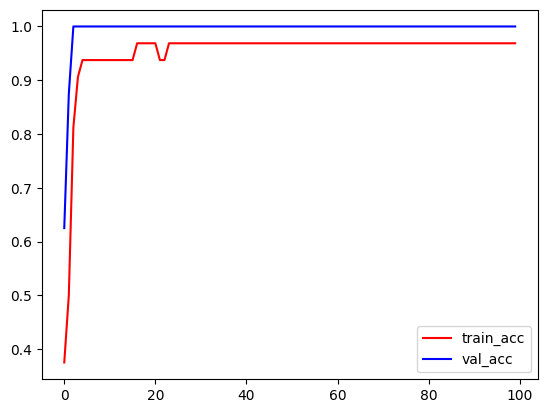

In [24]:
plt.plot(history2.history['accuracy'],color='red', label= 'train_acc')
plt.plot(history2.history['val_accuracy'],color='blue', label= 'val_acc')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

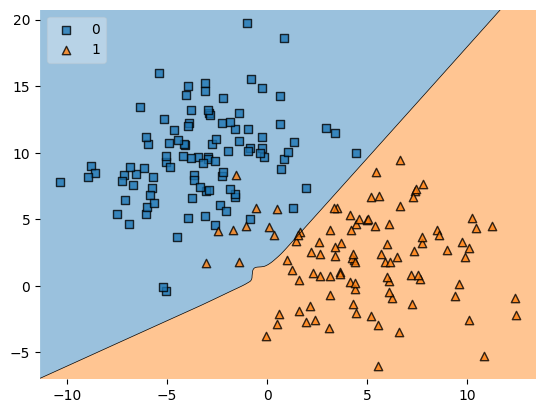

In [25]:
plot_decision_regions(X,y,clf=model2,legend=2)

# Model with hyperparameters tuned to fix overfitting

In [26]:
model3 = Sequential([
    Dense(128, activation='relu', input_dim=2),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [27]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               384       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                

In [28]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history3=model3.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 3s 60ms/step - loss: 0.5827 - accuracy: 0.6562 - val_loss: 0.5170 - val_accuracy: 0.8750
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4739 - accuracy: 0.8984 - val_loss: 0.4285 - val_accuracy: 0.8750
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3374 - accuracy: 0.9219 - val_loss: 0.3617 - val_accuracy: 0.9062
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2933 - accuracy: 0.9219 - val_loss: 0.3118 - val_accuracy: 0.9062
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2418 - accuracy: 0.9297 - val_loss: 0.2764 - val_accuracy: 0.9062
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2169 - accuracy: 0.9297 - val_loss: 0.2493 - val_accuracy: 0.9375
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1728 - accuracy: 0.9297 - val_loss: 0.2348 - val_accuracy: 0.9375
Epoch 8/100
4/4 [===

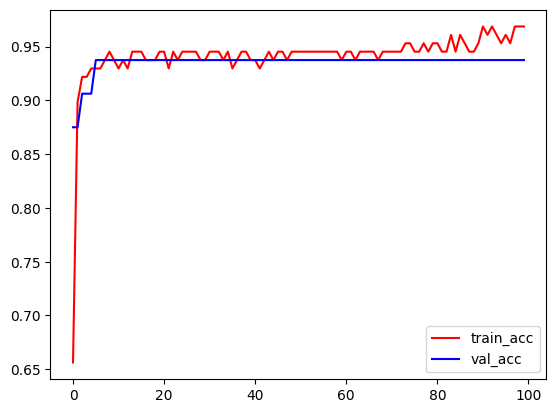

In [30]:
plt.plot(history3.history['accuracy'],color='red', label= 'train_acc')
plt.plot(history3.history['val_accuracy'],color='blue', label= 'val_acc')
plt.legend()
plt.show()

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

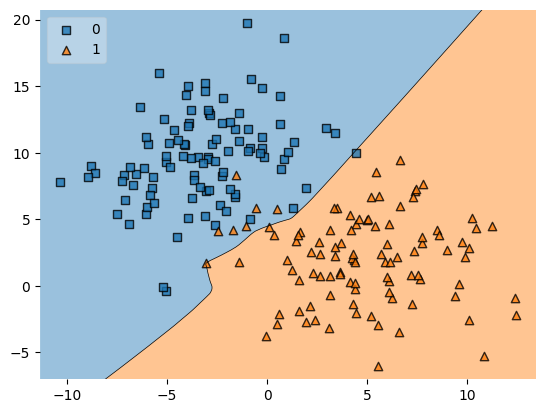

In [32]:
plot_decision_regions(X,y,clf=model3,legend=2)